在cuda:0上训练
Epoch:1, 训练损失:2.319, 训练准确率:0.102, 测试准确率:0.100
Epoch:2, 训练损失:1.325, 训练准确率:0.480, 测试准确率:0.564
Epoch:3, 训练损失:0.857, 训练准确率:0.658, 测试准确率:0.658
Epoch:4, 训练损失:0.713, 训练准确率:0.722, 测试准确率:0.707
Epoch:5, 训练损失:0.636, 训练准确率:0.752, 测试准确率:0.767
Epoch:6, 训练损失:0.586, 训练准确率:0.773, 测试准确率:0.779
Epoch:7, 训练损失:0.554, 训练准确率:0.787, 测试准确率:0.775
Epoch:8, 训练损失:0.520, 训练准确率:0.801, 测试准确率:0.779
Epoch:9, 训练损失:0.492, 训练准确率:0.812, 测试准确率:0.804
Epoch:10, 训练损失:0.474, 训练准确率:0.820, 测试准确率:0.791
Epoch:11, 训练损失:0.454, 训练准确率:0.830, 测试准确率:0.828
Epoch:12, 训练损失:0.440, 训练准确率:0.836, 测试准确率:0.808
Epoch:13, 训练损失:0.425, 训练准确率:0.841, 测试准确率:0.833
Epoch:14, 训练损失:0.415, 训练准确率:0.846, 测试准确率:0.825
Epoch:15, 训练损失:0.406, 训练准确率:0.849, 测试准确率:0.822
Epoch:16, 训练损失:0.391, 训练准确率:0.855, 测试准确率:0.827
Epoch:17, 训练损失:0.382, 训练准确率:0.858, 测试准确率:0.842
Epoch:18, 训练损失:0.374, 训练准确率:0.861, 测试准确率:0.804
Epoch:19, 训练损失:0.365, 训练准确率:0.865, 测试准确率:0.848
Epoch:20, 训练损失:0.360, 训练准确率:0.866, 测试准确率:0.822
Epoch:21, 训练损失:0.352, 训练准确率:0.869, 测试准确率:0.843
Epoch:22, 训

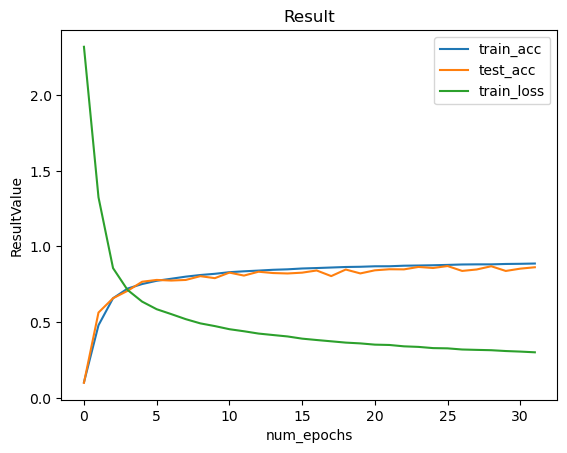

/home/lindenbaum/Documents/Python/DeepLearning/DeepLearning/CNN/st_train.py:226: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, axes = plt.subplots(1, n, figsize=(8, 8))


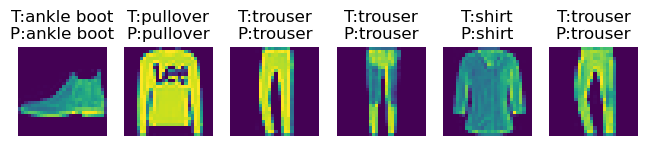

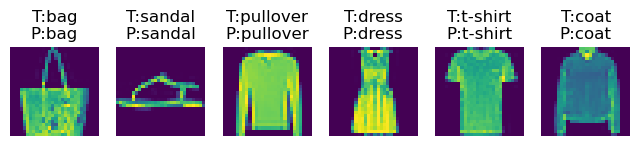

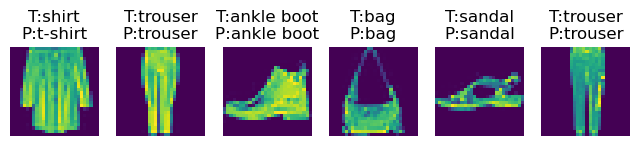

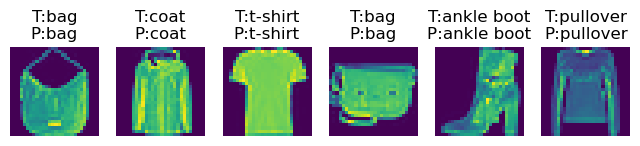

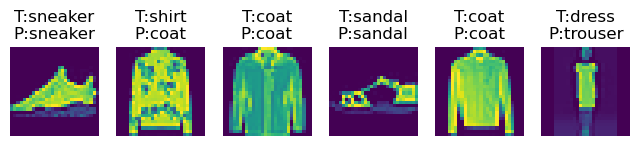

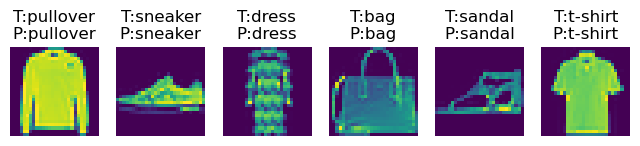

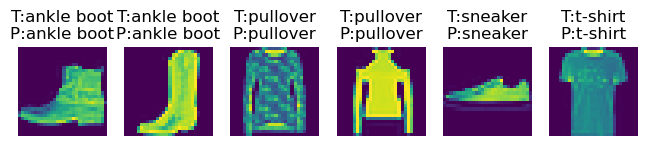

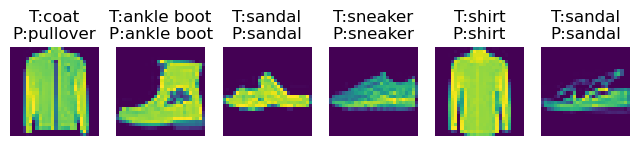

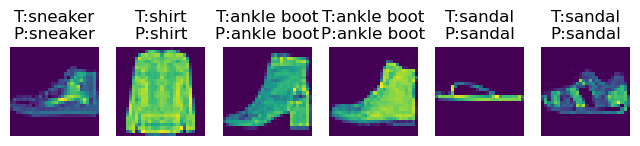

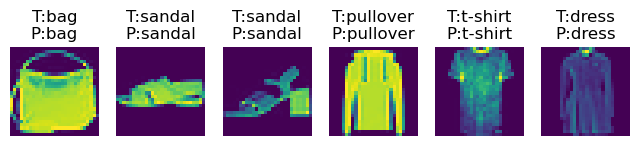

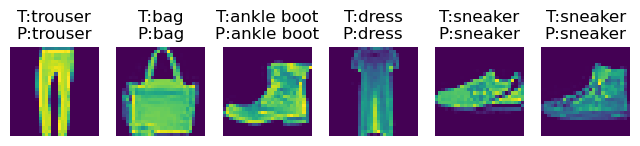

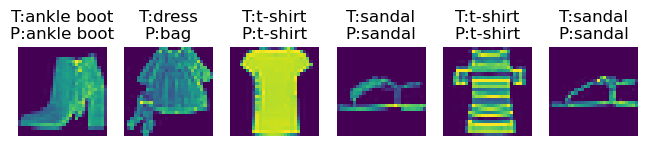

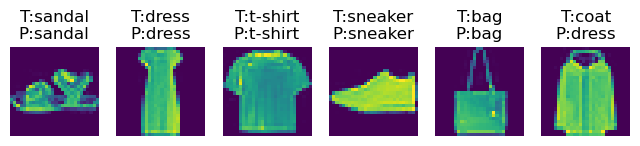

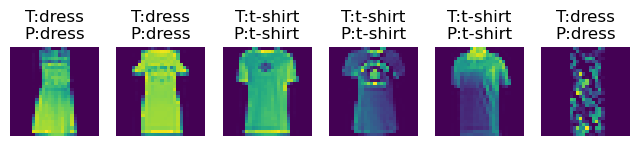

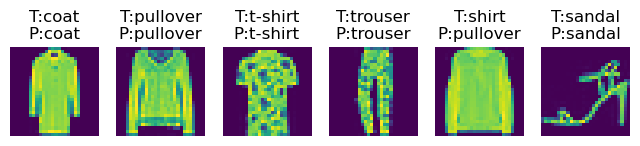

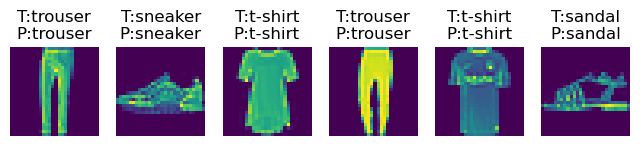

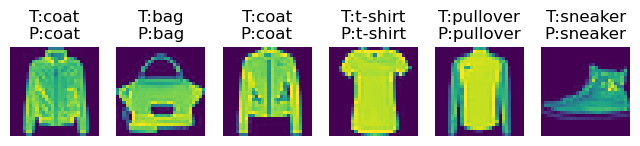

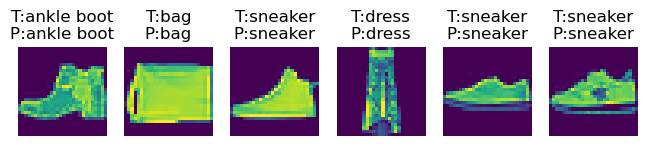

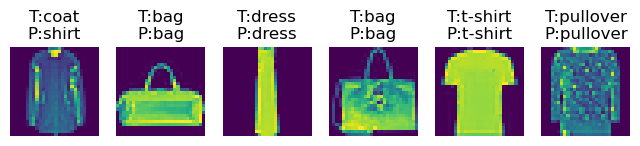

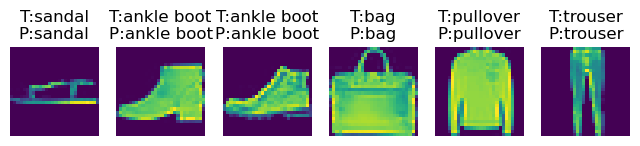

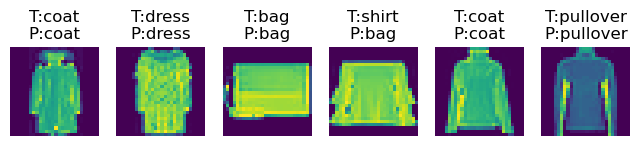

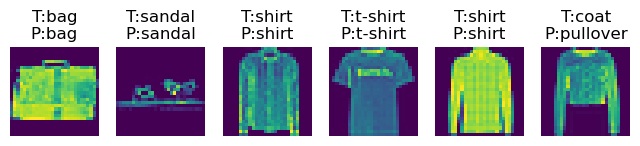

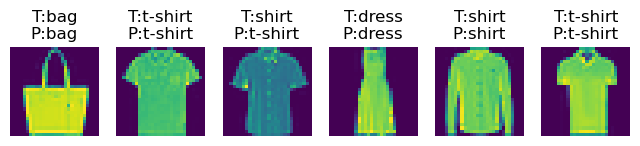

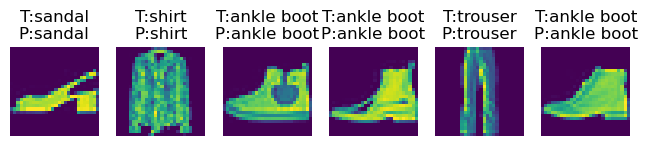

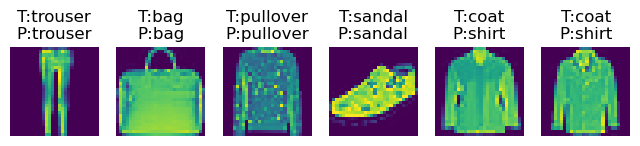

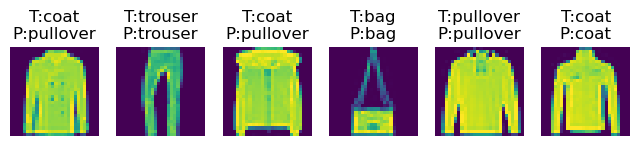

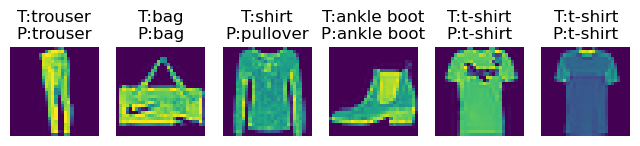

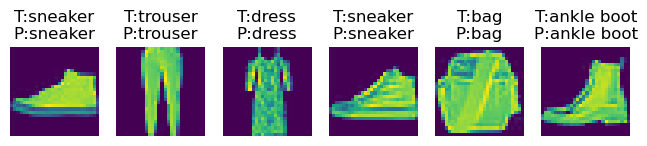

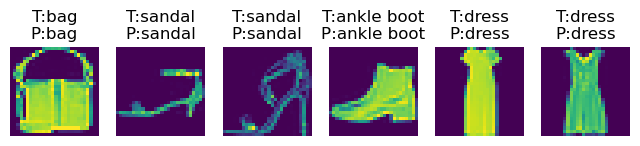

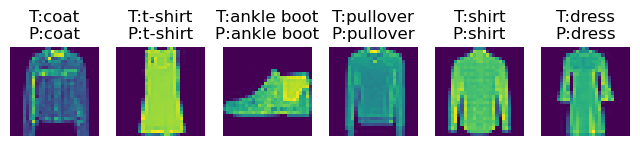

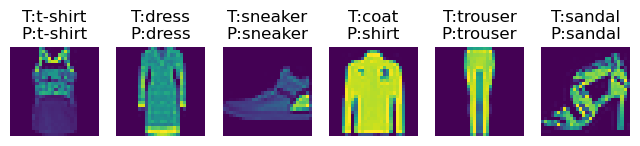

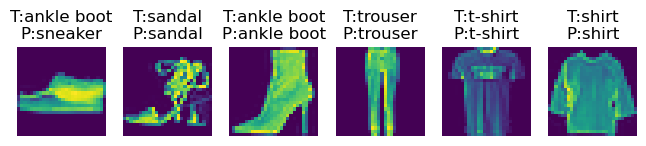

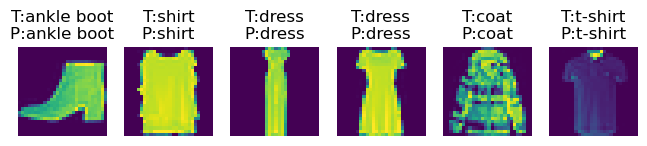

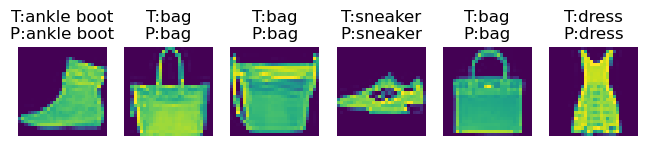

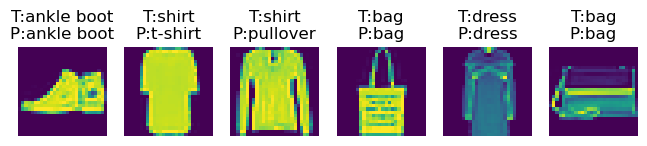

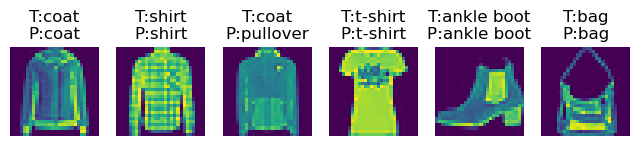

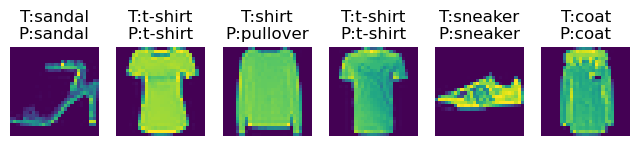

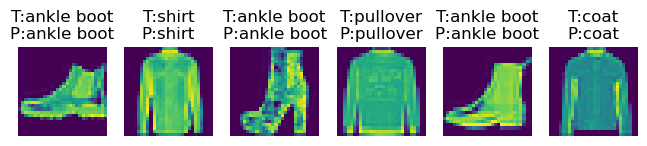

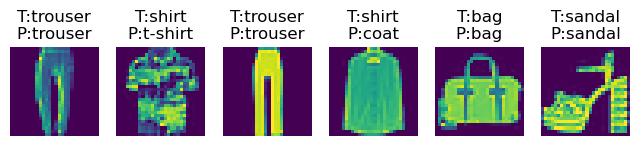

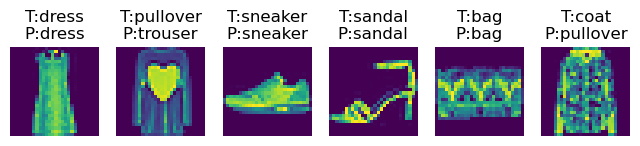

In [1]:
import st_train
from torch import nn
"""
LeNet是用于识别手写数字的卷积神经网络
LeNet结构:
1.输入:28*28图片输入
2.(卷积块)卷积层:6输出通道, 5*5卷积核, 步幅2, 一个sigmoid激活函数 -> 将输入映射到多个二维特征输出,同时增加通道的数量
3.(卷积块)汇聚层:2*2,步幅2的平均池操作,输出14*14
3.(卷积块)卷积层:16输出通道,5*5卷积核, 一个sigmoid激活函数
4.(卷积块)汇聚层:2*2,步幅2的平均池操作,输出5*5
5.(稠密块)全连接层:120个输出
6.(稠密块)全连接层:84个输出
7.(稠密块)全连接层:10个输出,即结果

为了将卷积块的输出传递给稠密块,须在小批量中展平每个样本。
换言之,将这个四维输入转换成全连接层所期望的二维输入。
第一个维度索引是小批量中的样本编号,
第二个维度给出每个样本的平面向量表示。
"""
LeNet = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(16*5*5, 120), nn.Sigmoid(),
    nn.Linear(120,84), nn.Sigmoid(),
    nn.Linear(84,10))

batch_size = 256
learning_rate = 0.9
num_epochs = 32
train_iter, test_iter = st_train.load_MINST_data(batch_size, num_workers=16)
result = st_train.ResVisualization(('train_acc','test_acc','train_loss'), num_epochs)
st_train.train_gpu(LeNet, train_iter, test_iter, num_epochs, learning_rate, st_train.try_gpu(), result)
result.plot_res()
st_train.std_prediction_gpu(LeNet, test_iter, device=st_train.try_gpu())